<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2.1 "Median value of owner-occupied homes" provide a boxplot

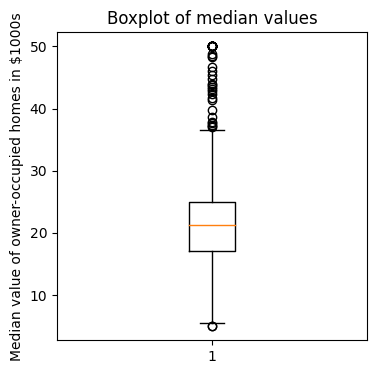

In [26]:
#ax = sns.boxplot(x='MEDV ', y='beauty', data=boston_df)
pyplot.figure(figsize=(4,4))
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of median values')
pyplot.ylabel('Median value of owner-occupied homes in $1000s')
pyplot.show()

In [ ]:
#Median value is ~20k, with significant outliers above 75th centile

#### Task 2.2 Provide a bar plot for the Charles river variable

Text(0, 0.5, 'Count')

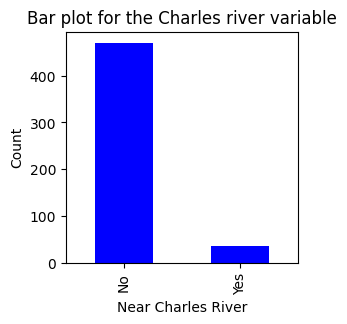

In [6]:
charles_river_df = pd.DataFrame()
charles_river_df['CHAS'] = boston_df['CHAS']

#Turn float into a boolean to show if it is near the Charles river
charles_river_df['Bool']  = charles_river_df['CHAS'].apply(lambda x: 'Yes' if x!=0 else 'No')
value_counts = charles_river_df['Bool'].value_counts()

pyplot.figure(figsize=(3,3))

value_counts.plot(kind='bar', color='blue')
pyplot.title('Bar plot for the Charles river variable')
pyplot.xlabel('Near Charles River')
pyplot.ylabel('Count')

####Vast majority of towns do not border the Charles river

#### Task 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 600x600 with 0 Axes>

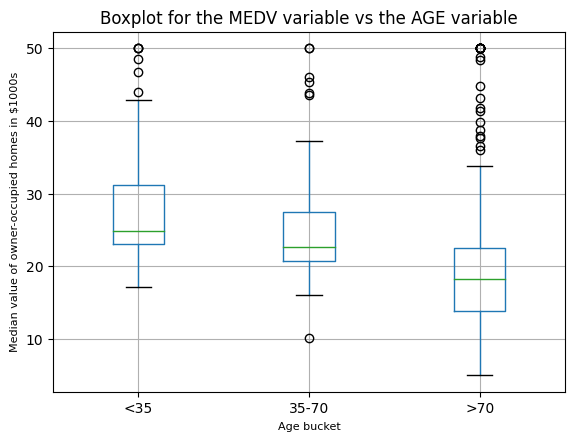

In [7]:
bins = [0, 35, 70, float('inf')]
labels = ['<35', '35-70', '>70']

boston_df['age_group_1_discretised'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels,  right=False)

#display(boston_df.head())

pyplot.figure(figsize=(6,6))
boston_df.boxplot(column='MEDV', by='age_group_1_discretised')
pyplot.xlabel('Age bucket', fontsize=8)
pyplot.ylabel('Median value of owner-occupied homes in $1000s', fontsize=8)
pyplot.title('Boxplot for the MEDV variable vs the AGE variable')

pyplot.suptitle('') #Supress the default title
pyplot.show()



In [ ]:
#### Conclusion: Inverse relationship between age and mediam house value. Younger group has a higher mediam value. Significant outliers in the 70+ bucket 

#### Task 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

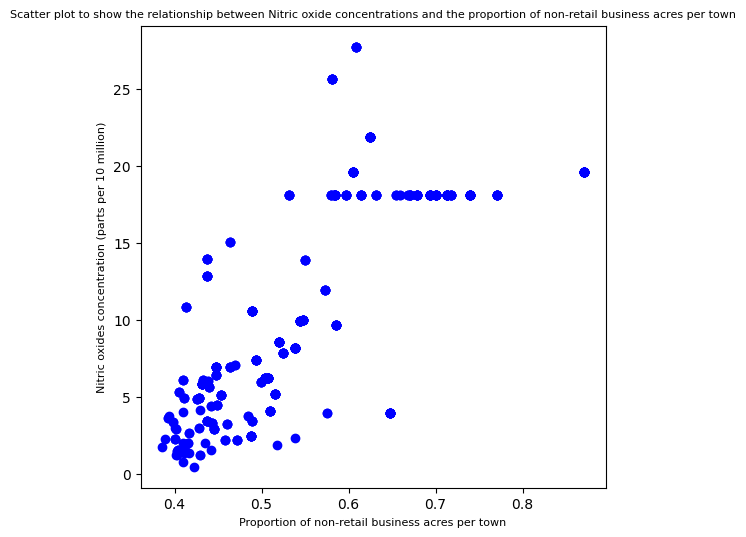

In [8]:
pyplot.figure(figsize=(6,6))
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], color='blue', marker='o')

#add labels and title
pyplot.xlabel('Proportion of non-retail business acres per town', fontsize=8)
pyplot.ylabel('Nitric oxides concentration (parts per 10 million)', fontsize=8)
pyplot.title('Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town', fontsize=8)



In [ ]:
####Conclusion: Scatter plot shows a positive correlation between the two variables

In [9]:
#### Task 2.5 Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

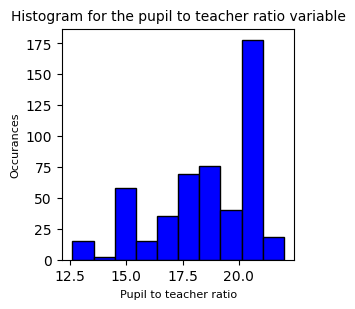

In [21]:
pyplot.figure(figsize=(3,3))
pyplot.hist(boston_df['PTRATIO'], color='blue', edgecolor='black')

#add labels and title
pyplot.xlabel('Pupil to teacher ratio', fontsize=8)
pyplot.ylabel('Occurances', fontsize=8)
pyplot.title('Histogram for the pupil to teacher ratio variable', fontsize=10)

####Conclusion: Most classes have a pupil to teacher ration of around 20. Minimon of 13 and max 22

#### Task 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#*   $H\_0: β1$ = 0 (Charles river bounds has no effect on house prices)
#*   $H\_1: β1$ is not equal to 0 (Charles river bounds has an effect on house prices


In [13]:
#correlation_coefficient, p_value = stats.pearsonr(boston_df['MEDV'], boston_df['CHAS'])

alpha = 0.05

#print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}") 
#print(f"P-Value: {p_value:.3f}")

## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['CHAS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHAS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           7.39e-05
Time:                        15:49:49   Log-Likelihood:                -16.144
No. Observations:                 506   AIC:                             36.29
Df Residuals:                     504   BIC:                             44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0399      0.029     -1.354      0.176      -0.098       0.018
MEDV           0.0048      0.001      3.996      0.000       0.002       0.007
==============================================================================
Omnibus:                      353.684   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2621.933
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      12.060   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in house prices based on bordering the Charles River. 

#### Task 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


State the Hypothesis:

*   $H\_0: µ1 = µ2  (the two population means are equal)
*   $H\_1:$ At least one of the means differ

In [17]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


**Conclusion:** We will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

#### Task 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the Hypothesis:

*   $H\_0: The two populations are not correlated
*   $H\_1:$ The two populations are  correlated

In [43]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(correlation_coefficient)
print(p_value)


0.7636514469209192
7.913361061210442e-98


In [ ]:
####Reject the null hypothesis as there is a strong correlation between NOX and Indus

#### Task 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [45]:
weight = 1.5

boston_df['weighted_dis'] = boston_df['DIS']  * weight

X = boston_df[['DIS', 'weighted_dis']]
X = sm.add_constant(X)

#define dependent variable
y = boston_df['MEDV']

#Fit regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:25:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.3901      0.817     22.499   

####Conclusion. weighted distance has a higher coef, indicating it is a better predictor of the Median value